This notebook reproduces figure 1(b) of https://arxiv.org/pdf/1910.08187.

In [2]:
import numpy as np
import pytest
from functools import partial
from qiskit_aer import AerSimulator
from itertools import combinations
from qokit.sk import sk_obj, get_sk_terms, get_random_J
from qokit.maxcut import maxcut_obj
from qokit.qaoa_objective_sk import get_qaoa_sk_objective
from qokit.utils import brute_force, precompute_energies
from qokit.parameter_utils import get_sk_gamma_beta
from qokit.fur import get_available_simulators, get_available_simulator_names

In [3]:
import matplotlib.pyplot as plt
from time import time

### Run the following cell only when to generate new data. Otherwise, smply use `numpy.load:`  

In [14]:
# import numpy as np
# import pytest
# from functools import partial
# from qiskit_aer import AerSimulator
# from itertools import combinations
# from qokit.sk import sk_obj, get_sk_terms, get_random_J
# from qokit.maxcut import maxcut_obj
# from qokit.qaoa_objective_sk import get_qaoa_sk_objective
# from qokit.utils import brute_force, precompute_energies
# from qokit.parameter_utils import get_sk_gamma_beta
# from qokit.fur import get_available_simulators, get_available_simulator_names

# import matplotlib.pyplot as plt
# from time import time

# simulator = "gpu"

# N = 26
# n_samples = 30
# C = []
# C_over_N = []
# p_list = []

# for p in range(1, 18):
#     gamma, beta = get_sk_gamma_beta(p)
#     C_p = []
#     for seed in range(0, n_samples):
#         J = get_random_J(N, seed=seed)
#         t1 = time()
#         obj = get_qaoa_sk_objective(N, p, J=J, 
#                             parameterization="gamma beta", simulator=simulator, 
#                             objective="expectation")(gamma, beta)
#         t2 = time()
#         C_p.append(obj)
#     C.append(C_p)
#     p_list.append([1/p]*n_samples)
#     C_over_N.append(np.mean(C_p)/N)
#     print(f"p = {p} done!")

# np.save("./assets/C_over_N.npy", np.array(C_over_N))
# np.save("./assets/C_p.npy", np.array(C))
# np.save("./assets/p_list.npy", np.array(p_list))

In [10]:
C_over_N = np.load("./assets/C_over_N.npy")
C_p = np.load("./assets/C_p.npy")
p_list = np.load("./assets/p_list.npy")

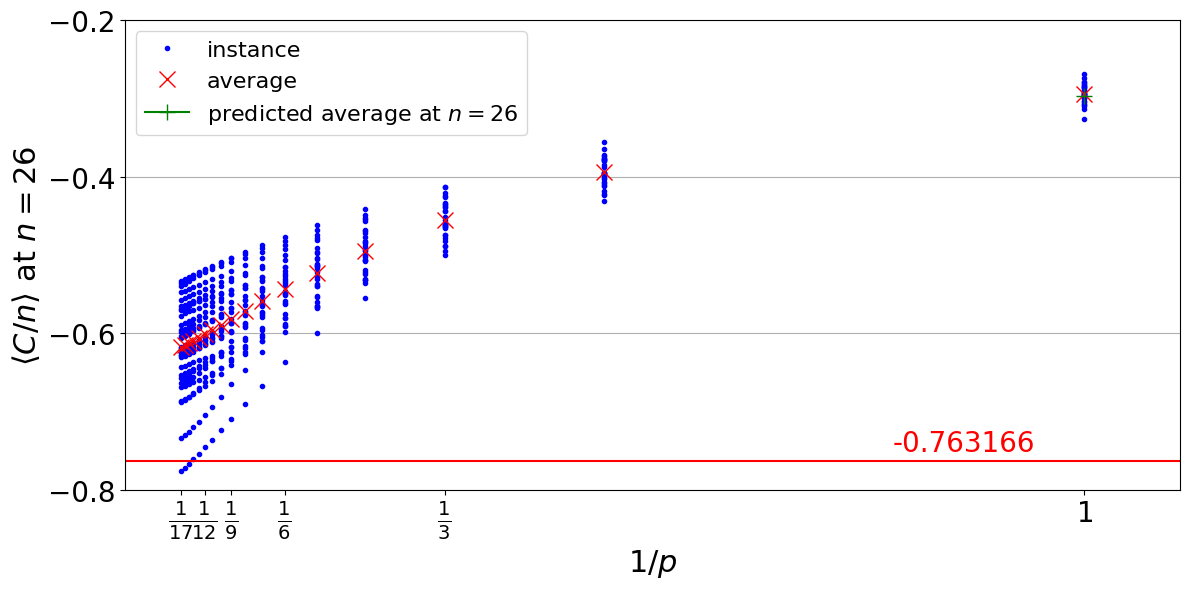

In [13]:
plt.figure(figsize=(12,6))
plt.plot(p_list[:-1], C_p[:-1]/26, ".", color='blue')
plt.plot(p_list[-1], C_p[-1]/26, ".", color='blue', label='instance')
plt.plot(p_list[:,0], C_over_N, "x", color='red', ms=12, label='average')
plt.plot([1], [-0.29726], marker="+", color='green', markersize=12, label=r'predicted average at $n=26$')
plt.hlines(-0.763166, -1, 13, color="red")
plt.text(0.8, -0.75, "-0.763166", color='red', fontsize=20)
plt.legend(fontsize=16)
plt.grid(axis='y')
plt.xlim([0, 1.1])
plt.ylim([-0.8,-0.2])
plt.xlabel(r"${1}/{p}$", fontsize=22)
plt.ylabel(r'$\langle C/n\rangle$ at $n=26$', fontsize=22)

tick_locations = [1/17, 1/12, 1/9, 1/6, 1/3, 1]
tick_labels = [r'$\frac{1}{17}$', r'$\frac{1}{12}$', r'$\frac{1}{9}$', r'$\frac{1}{6}$', r'$\frac{1}{3}$', r'$1$']
plt.xticks(ticks=tick_locations, labels=tick_labels, fontsize=20)
plt.yticks(ticks=[-0.8,-0.6,-0.4,-0.2],fontsize=20)
plt.tight_layout()
plt.show()